# Housing_Data


In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
df = pd.read_csv("HousingData.csv")

In [149]:
df.head(506)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [150]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

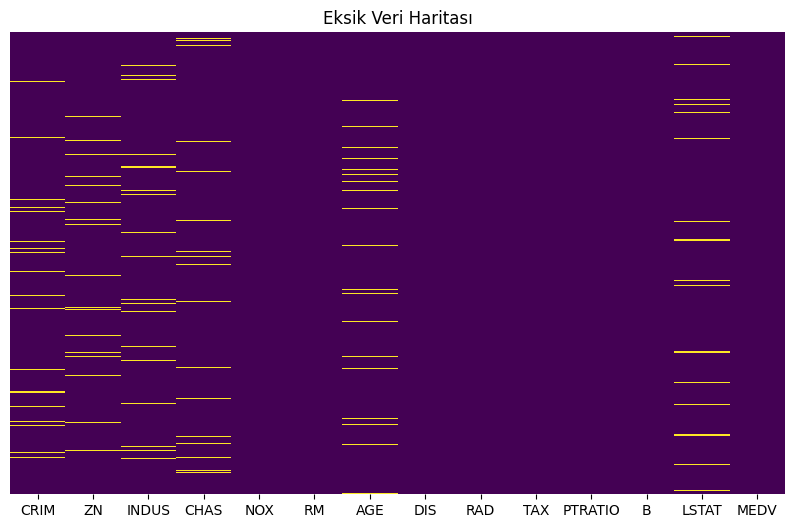

In [151]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Eksik Veri Haritası")
plt.show()


In [152]:
df[df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']].isna().any(axis=1)]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [153]:
df.dropna(inplace=True)


In [154]:
df.shape

(394, 14)

In [155]:
df["MEDV"].value_counts()

MEDV
50.0    12
25.0     6
23.1     6
19.6     5
21.7     5
        ..
13.0     1
12.0     1
14.6     1
8.1      1
18.3     1
Name: count, Length: 205, dtype: int64

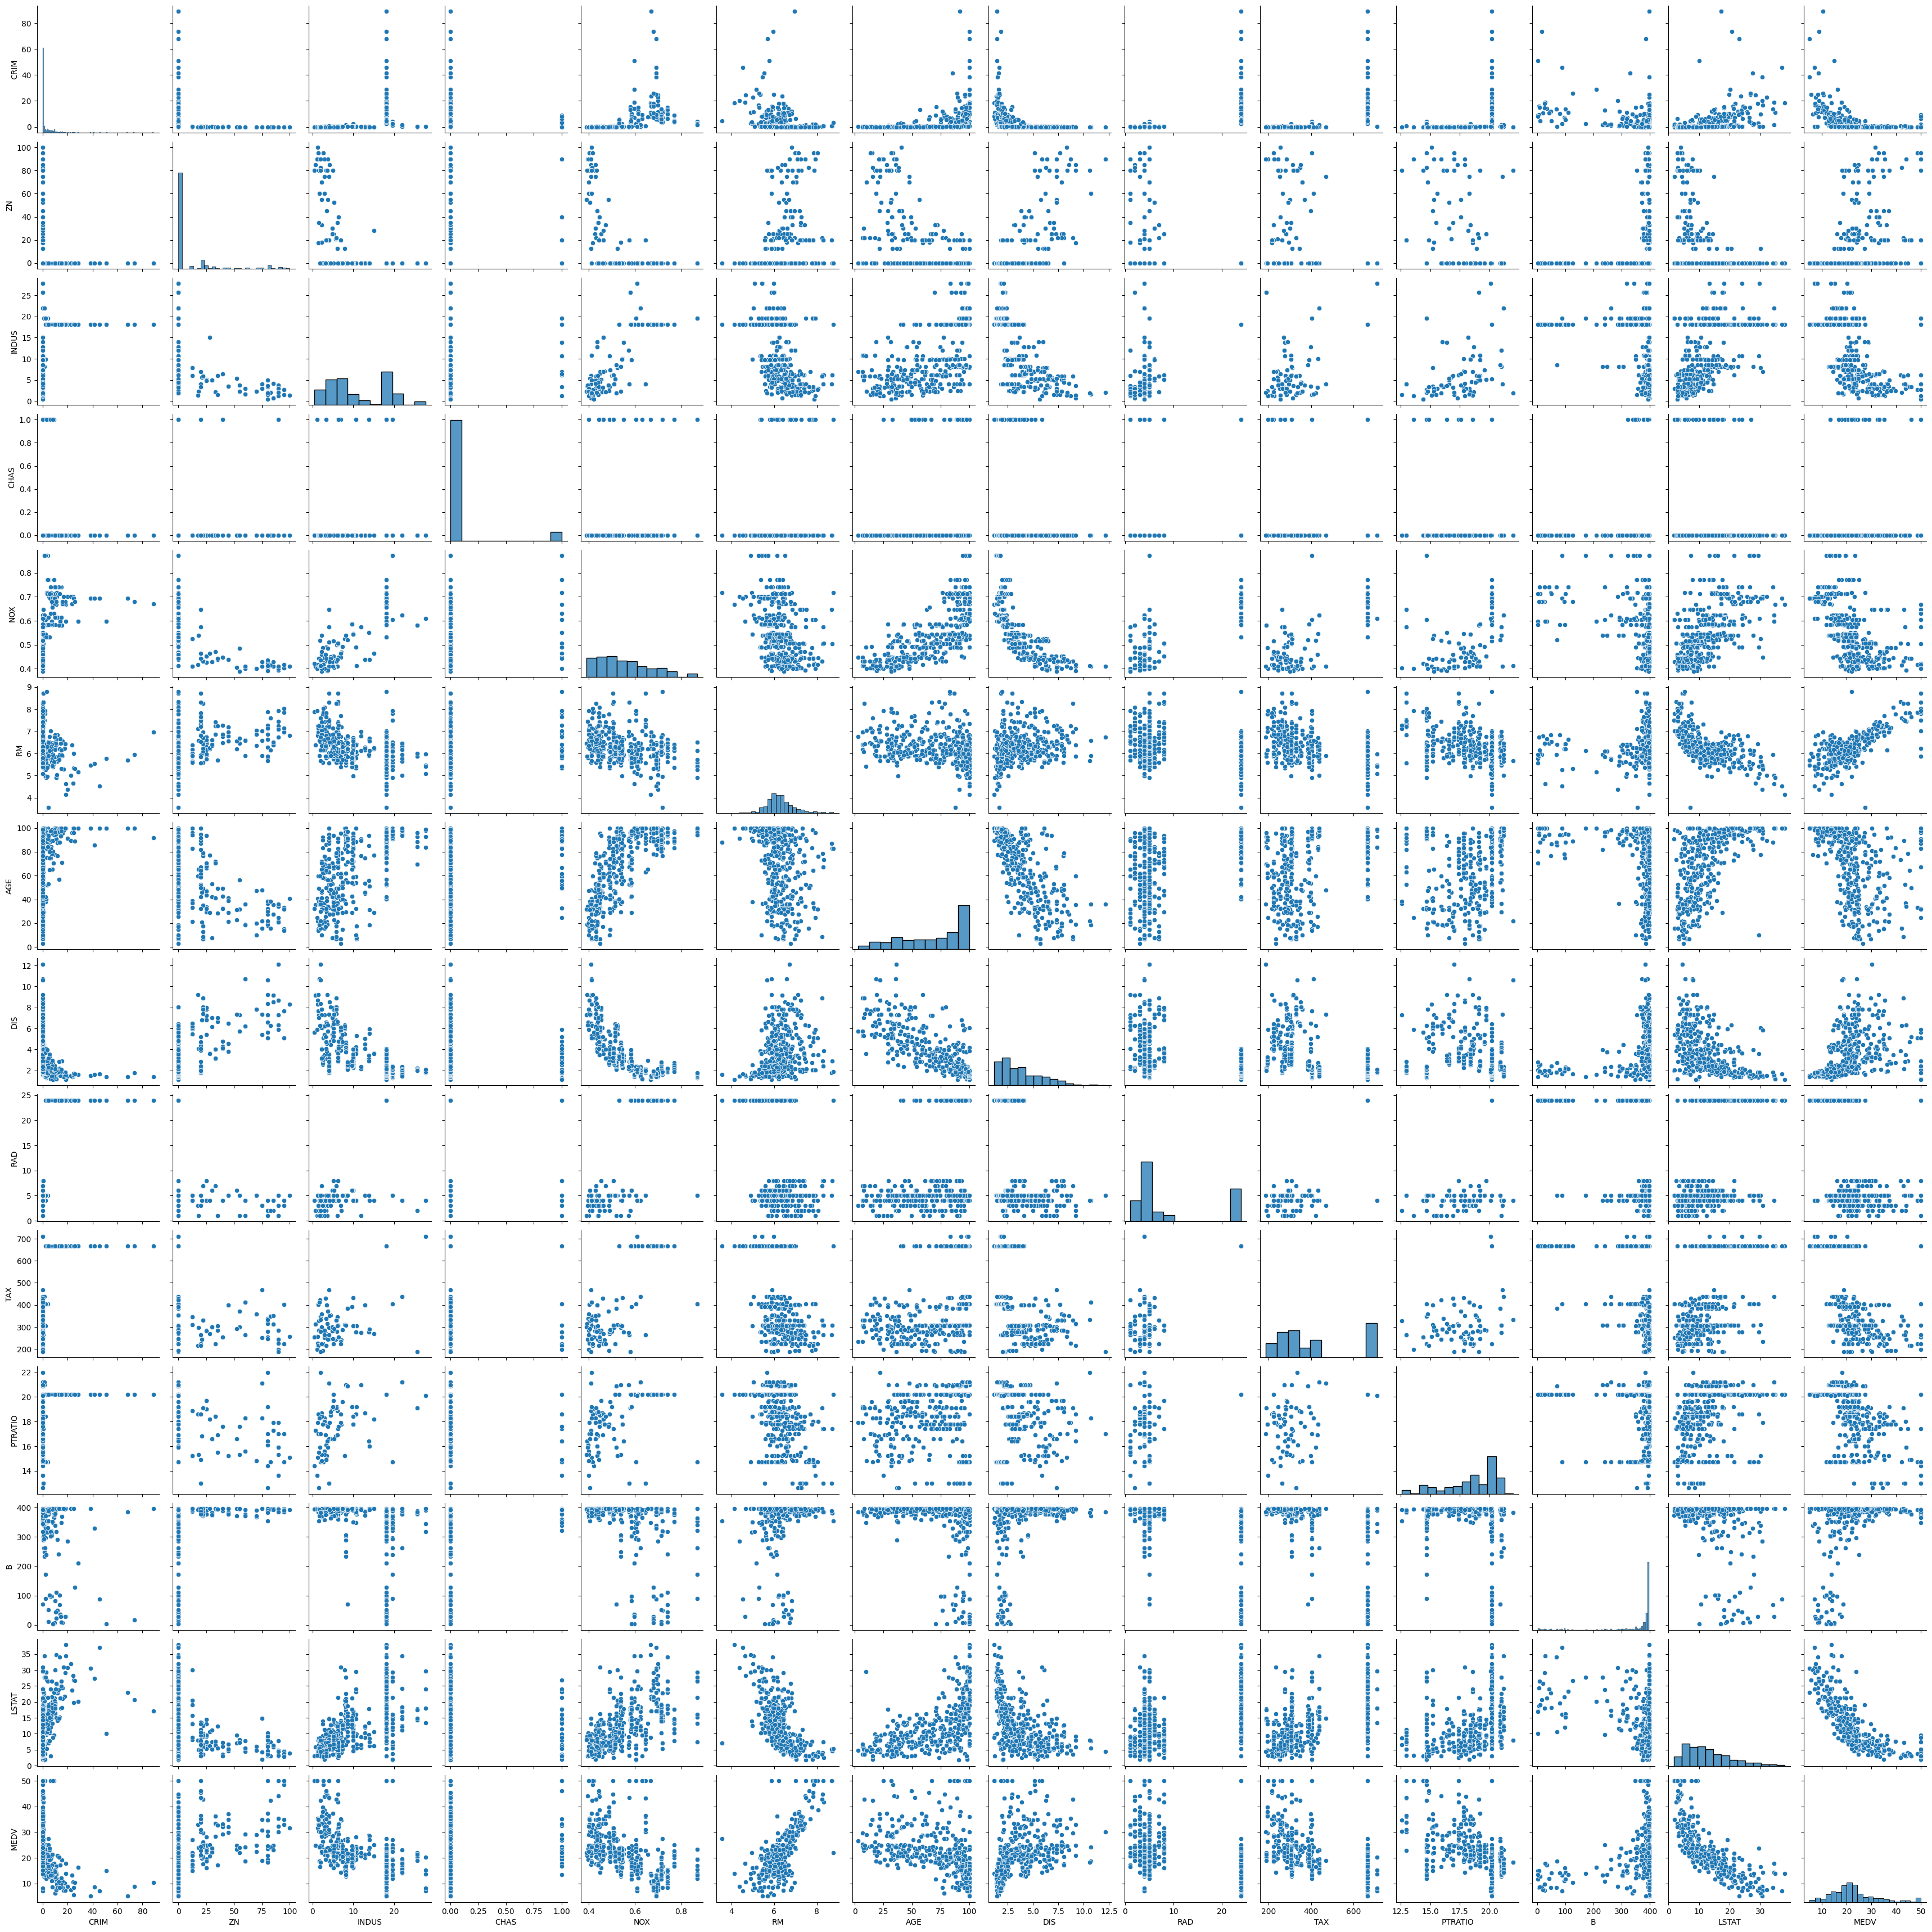

In [156]:
sns.pairplot(df)

<Axes: >

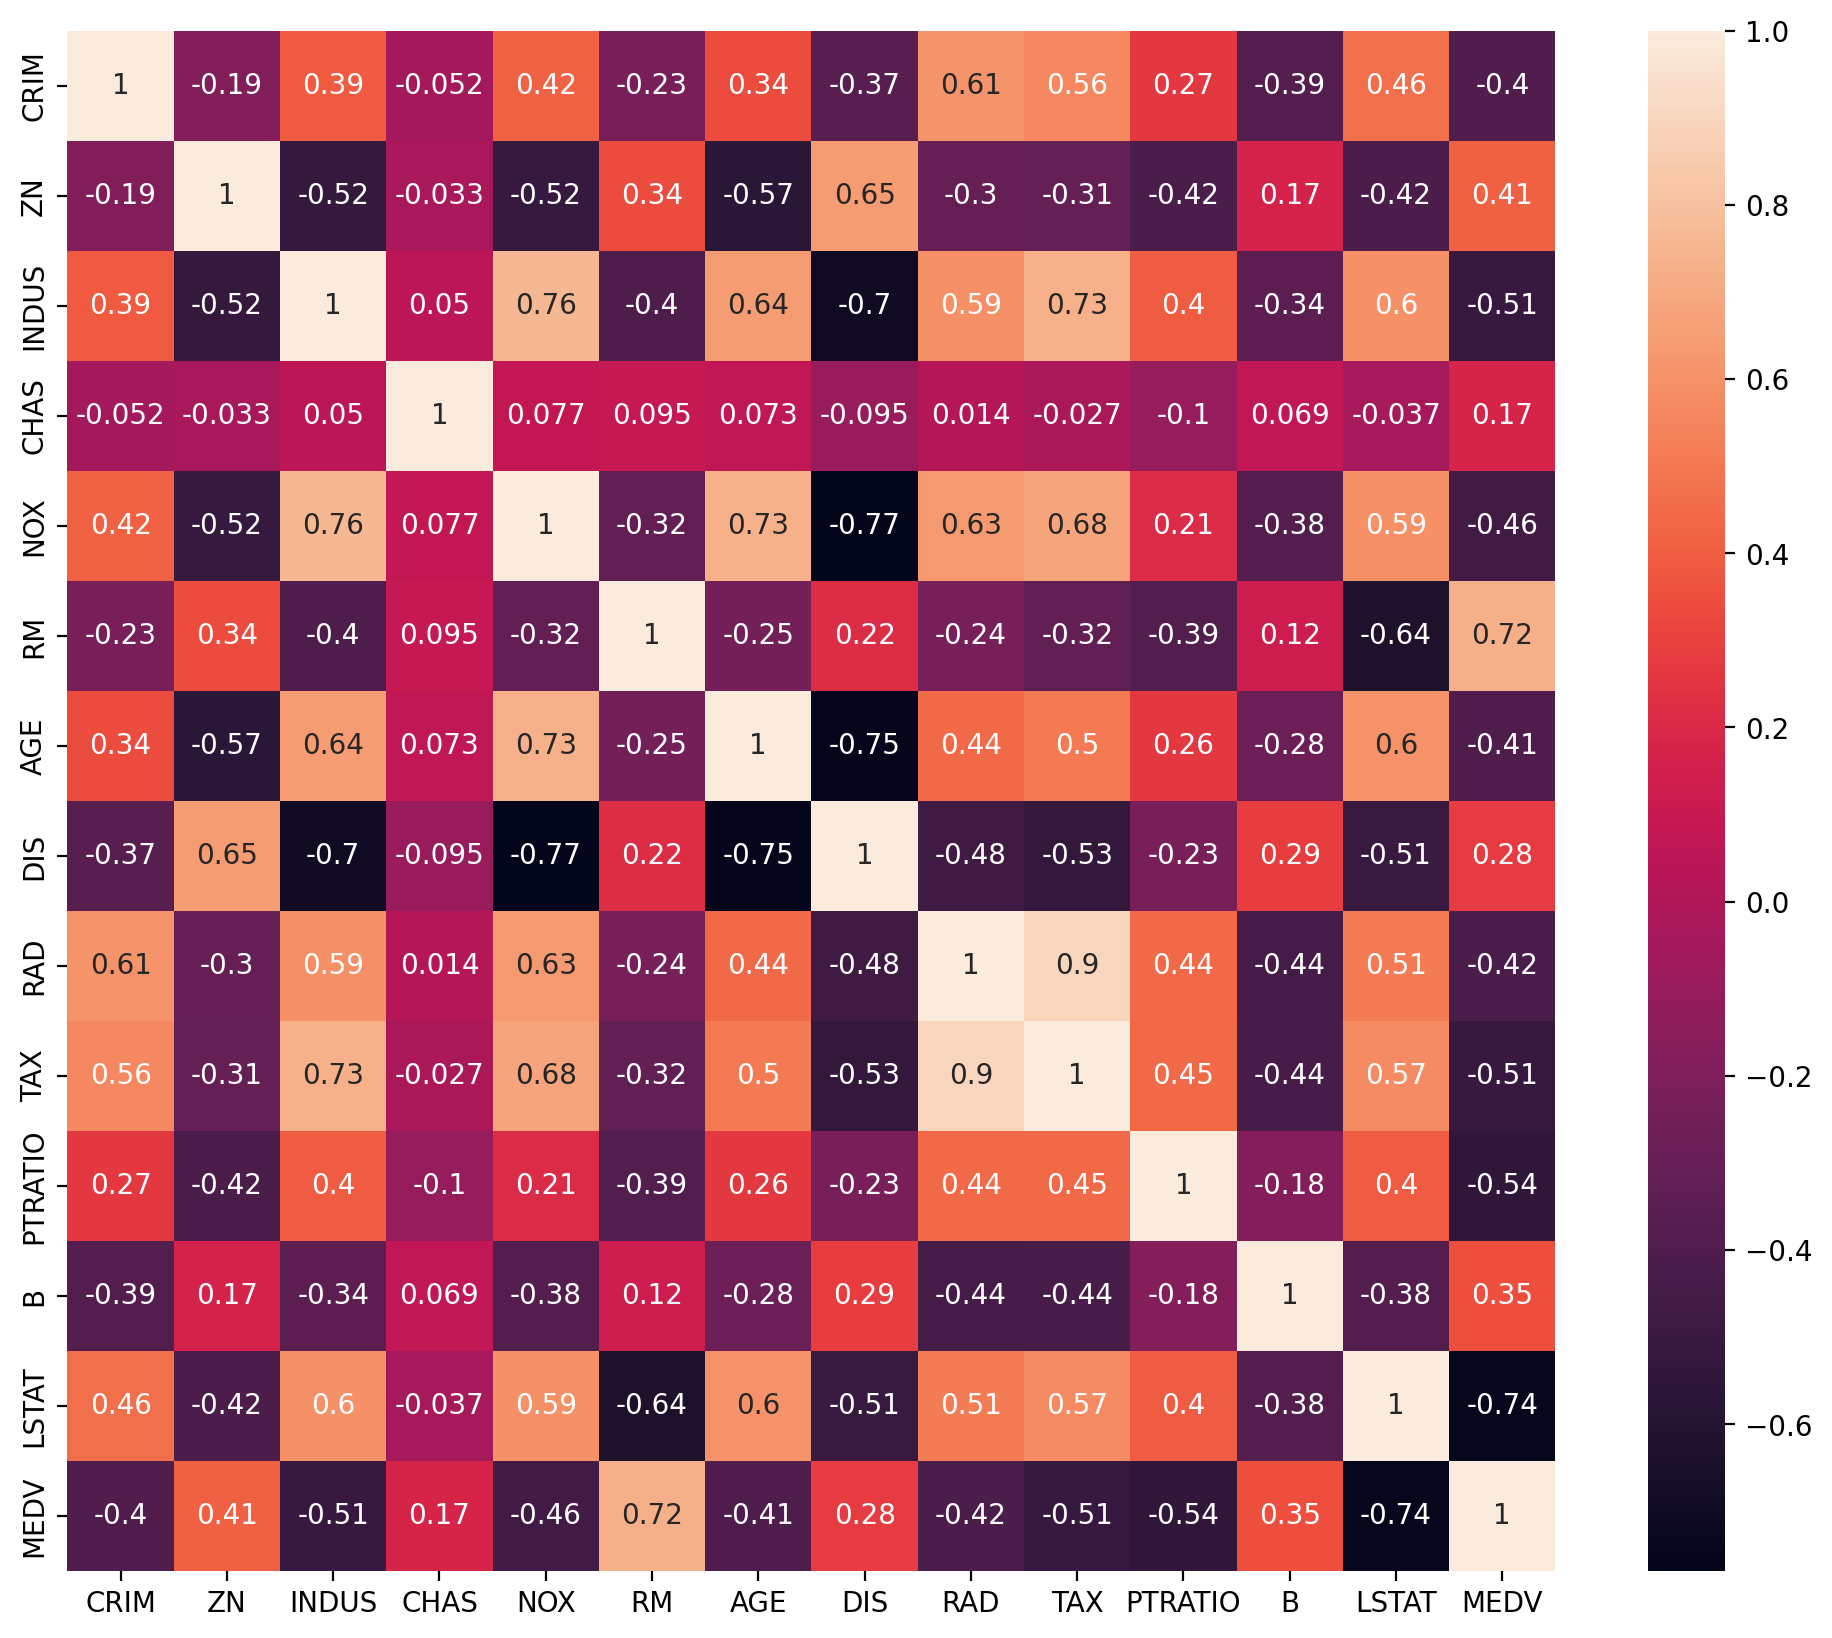

In [157]:
plt.figure(figsize=(12,10) , dpi = 200)
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='RM', ylabel='MEDV'>

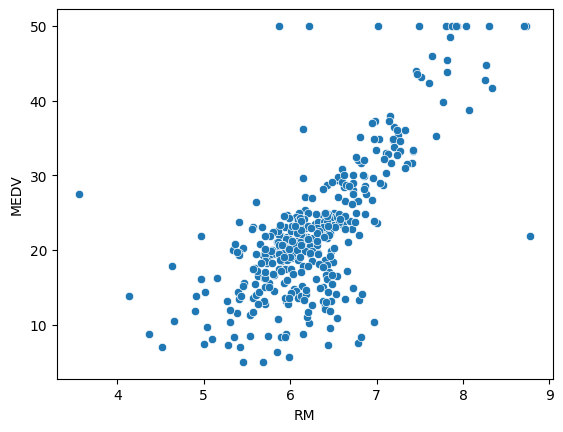

In [158]:
sns.scatterplot(x="RM", y="MEDV" , data=df  )

## KNN


-  Train TEST

In [159]:
x = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
   x, y, test_size=0.33, random_state=42)

* Standart Scaler

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

* KNN

In [164]:
from sklearn.neighbors import KNeighborsRegressor

In [165]:
knn = KNeighborsRegressor(n_neighbors=5)  # Varsayılan 5 komşu


In [166]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [167]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [168]:
knn.fit(scaler_X_train, y_train)

KNeighborsRegressor()

In [169]:
knn_Pred = knn.predict(scaler_X_test)

In [170]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error , accuracy_score

In [171]:
r2 = round(r2_score(y_test , knn_Pred),2)
mae = round(mean_absolute_error(y_test,knn_Pred),2)
rmse = round(np.sqrt(mean_squared_error(y_test , knn_Pred)),2)

In [172]:
print("r2 : " ,r2)
print("r2 : " ,mae)
print("r2 : " ,rmse)

r2 :  0.68
r2 :  3.1
r2 :  5.39


* En iyi değer

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

hata_oranı = []

for k in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(scaler_X_train, y_train)
    knn_pred = knn.predict(scaler_X_test)

    # Mean Absolute Error (MAE) kullan
    err = mean_absolute_error(y_test, knn_pred)
    
    hata_oranı.append(err)


Text(0.5, 0, 'K Değeri')

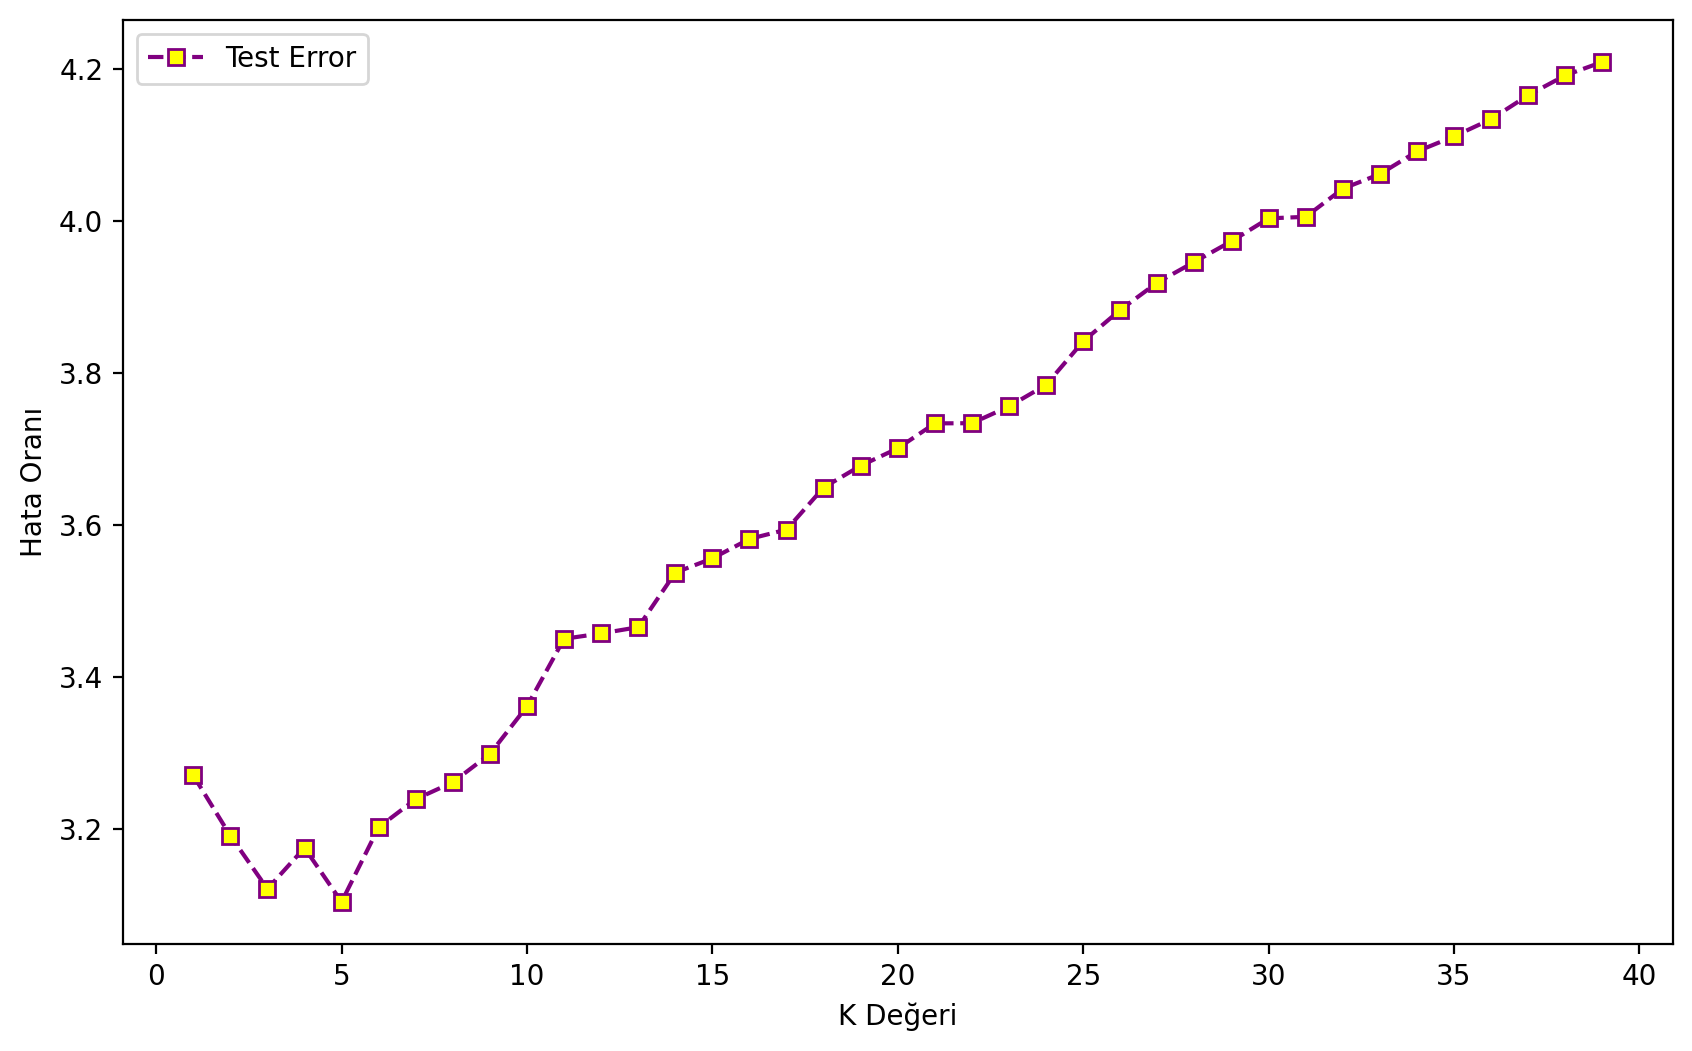

In [174]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,40),hata_oranı,color="purple", linestyle="dashed" ,
 marker="s" , markerfacecolor="yellow",label='Test Error')
plt.legend()
plt.ylabel('Hata Oranı')
plt.xlabel("K Değeri")

In [175]:
knn = KNeighborsRegressor(n_neighbors=5)  # Varsayılan 5 komşu

knn.fit(scaler_X_train, y_train)
knn_Pred = knn.predict(scaler_X_test)
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error , accuracy_score
r2 = round(r2_score(y_test , knn_Pred),2)
mae = round(mean_absolute_error(y_test,knn_Pred),2)
rmse = round(np.sqrt(mean_squared_error(y_test , knn_Pred)),2)
print("r2 : " ,r2)
print("r2 : " ,mae)
print("r2 : " ,rmse)

r2 :  0.68
r2 :  3.1
r2 :  5.39


# Random Forest

* Train Test

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x= df.drop("MEDV" , axis=1)
y=df["MEDV"]

In [178]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [179]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.3, random_state=9)

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [265]:
n_est = [100,150,200,250,300]


bootstrap_sec = [True, False]
# Gridsearch true mu false mu diye seçecek.
# False ise her ağaç için bütün verileri kullanacak (3429 veri için)
# True ise hepsini değil bir kaç tanesini seçecek

oob = [True, False]
# Bootstrap yalnızca true iken çalışır
# Seçilen veriler dışında bir veri eklenip eklenmeyeceği
# Kontrol açısından farklı veri ekleyeyim mi ? 
# out of bed

parameters = {
    "n_estimators": n_est,
    "bootstrap": bootstrap_sec,
    "oob_score": oob
}

In [266]:
random_forest = RandomForestRegressor()  # Regresyon modeli kullanıyoruz

In [267]:
grid = GridSearchCV(random_forest, parameters, cv=5, scoring='neg_mean_squared_error')

In [268]:
# Modeli eğitme
grid.fit(X_train, y_train)

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pac

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'oob_score': [True, False]},
             scoring='neg_mean_squared_error')

In [269]:
print("En iyi parametreler:", grid.best_params_)

En iyi parametreler: {'bootstrap': True, 'n_estimators': 100, 'oob_score': False}


In [270]:
pred = grid.predict(X_test)

In [271]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

In [272]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 2.0489495798319326
Mean Squared Error (MSE): 8.956988344537814
Root Mean Squared Error (RMSE): 2.9928228054025876
R-squared (R²): 0.8914086662288423


# SONUÇ OLARAK

Denenen modeller üzerinden en iyisinin random forest olduğu gözükmektedir